In [1]:
library(clusterProfiler)
library(org.Hs.eg.db)
library(ReactomePA)
library(tidyverse)



Registered S3 method overwritten by 'enrichplot':
  method               from
  fortify.enrichResult DOSE

clusterProfiler v3.14.3  For help: https://guangchuangyu.github.io/software/clusterProfiler

If you use clusterProfiler in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Yanyan Han, Qing-Yu He. clusterProfiler: an R package for comparing biological themes among gene clusters. OMICS: A Journal of Integrative Biology. 2012, 16(5):284-287.

Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are

In [2]:
setwd('/Users//matthewcoates/Documents/Cambridge/R files/COVID scRNAseq nasal biopsy + blood/DEGs/')

In [3]:
degs <- as.list(list.files('120721/SevereCovVHealthy/', full.names= TRUE, pattern ='.csv'))

In [4]:

names(degs) <- gsub('120721/SevereCovVHealthy/DEG_B_Naive_sCovH.csv', '', list.files('120721/SevereCovVHealthy/',pattern ='.csv'))
names(degs) <- substr(names(degs), start = 1, stop = nchar(names(degs))-4)
names(degs)



[1] "DEG_B_follicular_sCovH"          "DEG_B_mem_nonswitched_sCovH"    
 [3] "DEG_B_mem_switched_sCovH"        "DEG_B_Naive_sCovH"              
 [5] "DEG_Baso_sCovH"                  "DEG_CD4_Act_sCovH"              
 [7] "DEG_CD4_Tcm_sCovH"               "DEG_CD4_Tem_sCovH"              
 [9] "DEG_CD4_Th17_sCovH"              "DEG_CD4_Th2_sCovH"              
[11] "DEG_CD4_Tn_sCovH"                "DEG_CD4_Trm_sCovH"              
[13] "DEG_CD8_CTL_sCovH"               "DEG_CD8_Tn_sCovH"               
[15] "DEG_CD8_Trm_sCovH"               "DEG_DC_c141_sCovH"              
[17] "DEG_DC_cCD1c_sCovH"              "DEG_DC_follicular_sCovH"        
[19] "DEG_DC_plasmacytoid_sCovH"       "DEG_Endo_Stromal_sCovH"         
[21] "DEG_Epi_Basal_sCovH"             "DEG_Epi_Ciliated_sCovH"         
[23] "DEG_Epi_secretory_sCovH"         "DEG_Epi_Squamous_sCovH"         
[25] "DEG_gdT_vd1_sCovH"               "DEG_gdT_vd2_sCovH"              
[27] "DEG_gdT_vd3_sCovH"               "DEG_ILC_sCovH"                  
[29] "DEG_Mac_nr_sCovH"                "DEG_Mac_r_sCovH"                
[31] "DEG_MAIT_sCovH"                  "DEG_Mast_sCovH"                 
[33] "DEG_Mega_sCovH"                  "DEG_Mono_classical_sCovH"       
[35] "DEG_Monocyte_nonclassical_sCovH" "DEG_NK_adaptive_sCovH"          
[37] "DEG_NK_CD16_sCovH"               "DEG_NK_CD56_sCovH"              
[39] "DEG_Plasma_blastIgM_sCovH"       "DEG_Plasma_sCovH"               
[41] "DEG_Tfh_sCovH"                   "DEG_Treg_sCovH"

In [5]:
degs

$DEG_B_follicular_sCovH
[1] "120721/SevereCovVHealthy//DEG_B_follicular_sCovH.csv"

$DEG_B_mem_nonswitched_sCovH
[1] "120721/SevereCovVHealthy//DEG_B_mem_nonswitched_sCovH.csv"

$DEG_B_mem_switched_sCovH
[1] "120721/SevereCovVHealthy//DEG_B_mem_switched_sCovH.csv"

$DEG_B_Naive_sCovH
[1] "120721/SevereCovVHealthy//DEG_B_Naive_sCovH.csv"

$DEG_Baso_sCovH
[1] "120721/SevereCovVHealthy//DEG_Baso_sCovH.csv"

$DEG_CD4_Act_sCovH
[1] "120721/SevereCovVHealthy//DEG_CD4_Act_sCovH.csv"

$DEG_CD4_Tcm_sCovH
[1] "120721/SevereCovVHealthy//DEG_CD4_Tcm_sCovH.csv"

$DEG_CD4_Tem_sCovH
[1] "120721/SevereCovVHealthy//DEG_CD4_Tem_sCovH.csv"

$DEG_CD4_Th17_sCovH
[1] "120721/SevereCovVHealthy//DEG_CD4_Th17_sCovH.csv"

$DEG_CD4_Th2_sCovH
[1] "120721/SevereCovVHealthy//DEG_CD4_Th2_sCovH.csv"

$DEG_CD4_Tn_sCovH
[1] "120721/SevereCovVHealthy//DEG_CD4_Tn_sCovH.csv"

$DEG_CD4_Trm_sCovH
[1] "120721/SevereCovVHealthy//DEG_CD4_Trm_sCovH.csv"

$DEG_CD8_CTL_sCovH
[1] "120721/SevereCovVHealthy//DEG_CD8_CTL_sCovH.csv"

$DEG_CD8_Tn_sCovH
[1] "120721/SevereCovVHealthy//DEG_CD8_Tn_sCovH.csv"

$DEG_CD8_Trm_sCovH
[1] "120721/SevereCovVHealthy//DEG_CD8_Trm_sCovH.csv"

$DEG_DC_c141_sCovH
[1] "120721/SevereCovVHealthy//DEG_DC_c141_sCovH.csv"

$DEG_DC_cCD1c_sCovH
[1] "120721/SevereCovVHealthy//DEG_DC_cCD1c_sCovH.csv"

$DEG_DC_follicular_sCovH
[1] "120721/SevereCovVHealthy//DEG_DC_follicular_sCovH.csv"

$DEG_DC_plasmacytoid_sCovH
[1] "120721/SevereCovVHealthy//DEG_DC_plasmacytoid_sCovH.csv"

$DEG_Endo_Stromal_sCovH
[1] "120721/SevereCovVHealthy//DEG_Endo_Stromal_sCovH.csv"

$DEG_Epi_Basal_sCovH
[1] "120721/SevereCovVHealthy//DEG_Epi_Basal_sCovH.csv"

$DEG_Epi_Ciliated_sCovH
[1] "120721/SevereCovVHealthy//DEG_Epi_Ciliated_sCovH.csv"

$DEG_Epi_secretory_sCovH
[1] "120721/SevereCovVHealthy//DEG_Epi_secretory_sCovH.csv"

$DEG_Epi_Squamous_sCovH
[1] "120721/SevereCovVHealthy//DEG_Epi_Squamous_sCovH.csv"

$DEG_gdT_vd1_sCovH
[1] "120721/SevereCovVHealthy//DEG_gdT_vd1_sCovH.csv"

$DEG_gdT_vd2_sCovH
[1] "120721/SevereCovVHealthy//DEG_gdT_vd2_sCovH.csv"

$DEG_gdT_vd3_sCovH
[1] "120721/SevereCovVHealthy//DEG_gdT_vd3_sCovH.csv"

$DEG_ILC_sCovH
[1] "120721/SevereCovVHealthy//DEG_ILC_sCovH.csv"

$DEG_Mac_nr_sCovH
[1] "120721/SevereCovVHealthy//DEG_Mac_nr_sCovH.csv"

$DEG_Mac_r_sCovH
[1] "120721/SevereCovVHealthy//DEG_Mac_r_sCovH.csv"

$DEG_MAIT_sCovH
[1] "120721/SevereCovVHealthy//DEG_MAIT_sCovH.csv"

$DEG_Mast_sCovH
[1] "120721/SevereCovVHealthy//DEG_Mast_sCovH.csv"

$DEG_Mega_sCovH
[1] "120721/SevereCovVHealthy//DEG_Mega_sCovH.csv"

$DEG_Mono_classical_sCovH
[1] "120721/SevereCovVHealthy//DEG_Mono_classical_sCovH.csv"

$DEG_Monocyte_nonclassical_sCovH
[1] "120721/SevereCovVHealthy//DEG_Monocyte_nonclassical_sCovH.csv"

$DEG_NK_adaptive_sCovH
[1] "120721/SevereCovVHealthy//DEG_NK_adaptive_sCovH.csv"

$DEG_NK_CD16_sCovH
[1] "120721/SevereCovVHealthy//DEG_NK_CD16_sCovH.csv"

$DEG_NK_CD56_sCovH
[1] "120721/SevereCovVHealthy//DEG_NK_CD56_sCovH.csv"

$DEG_Plasma_blastIgM_sCovH
[1] "120721/SevereCovVHealthy//DEG_Plasma_blastIgM_sCovH.csv"

$DEG_Plasma_sCovH
[1] "120721/SevereCovVHealthy//DEG_Plasma_sCovH.csv"

$DEG_Tfh_sCovH
[1] "120721/SevereCovVHealthy//DEG_Tfh_sCovH.csv"

$DEG_Treg_sCovH
[1] "120721/SevereCovVHealthy//DEG_Treg_sCovH.csv"

In [6]:
degs <- lapply(degs,function(i){
  read.table(i, header = T, sep = ",", row.names = NULL)
})
degs <- degs[order(names(degs))]
degs

X,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
IFI44L,1.798969e-66,1.806605,0.262,0.014,4.618854e-62
IFITM1,1.990963e-44,1.522021,0.637,0.353,5.111797e-40
LY6E,1.033622e-33,1.267994,0.490,0.225,2.653826e-29
MX1,2.884807e-31,1.319139,0.323,0.102,7.406742e-27
TXNIP,3.497084e-30,1.040347,0.667,0.416,8.978762e-26
IRF7,3.642503e-25,1.024203,0.269,0.087,9.352127e-21
JUNB,1.595115e-23,-1.222732,0.415,0.646,4.095458e-19
STAG3,7.267130e-21,1.209748,0.282,0.111,1.865836e-16
NR4A2,3.358752e-19,-1.716607,0.095,0.293,8.623595e-15


In [7]:
# form each list, extract the genes and ranking
geneList <- lapply(degs, function(x) {
 j <- AnnotationDbi::select(org.Hs.eg.db, keys = as.character(x$X), columns = c("ENTREZID", "SYMBOL"), keytype = "SYMBOL")
 x$ENTREZID = j$ENTREZID[match(x$X, j$SYMBOL)]
 y <- grepl('^RPS|^RPL|^MRPL|^MRPS|^MT-|^HBB', x$X) 
    # change X1 to column name of deg file holding the gene name
 x <- x[!y, ]
 gl <- x %>% dplyr::select(ENTREZID, avg_log2FC, p_val) # change X1, avg_logFC and p_val to the relevant column names
 gl$neglog10pval <- -log10(gl$p_val) # change p_val to the relevant column names
 rank <- unlist(gl$neglog10pval*sign(gl$avg_log2FC)) # change avg_logFC to the relevant column names
 rank[which(rank == -Inf)] <- -308
 rank[which(rank == Inf)] <- 308
 names(rank) <- gl$ENTREZID
 rank <- rev(sort(rank))
 return(rank)
})

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' ret

In [8]:
head(geneList)

$DEG_B_follicular_sCovH
     10964       8519       4061       4599      10628       3665      10734 
 65.744976  43.700937  32.985638  30.539883  29.456294  24.438600  20.138637 
     51646       7430       7832       2353       6515       9308       4929 
 -7.759689 -10.273824 -11.460839 -12.399878 -14.010177 -16.350990 -18.473822 
      3726 
-22.797208 

$DEG_B_mem_nonswitched_sCovH
     10964       4061       8519      10628       4599      10734      51646 
 64.139781  33.705232  29.023419  25.317563  25.172710  24.740592  -5.559553 
      6421       1604       5966       6515       2353       7832       9308 
 -5.697100  -6.609308  -9.685871  -9.867095 -10.464240 -11.593511 -14.243216 
      7430       4929       3726 
-14.963135 -16.314677 -21.176943 

$DEG_B_mem_switched_sCovH
      8519       4061      10734       2353       5966       6515       3127 
 230.58264  187.15357  145.95190  -97.60822 -102.55509 -108.83086 -111.66425 
      3726       7430       7832       4929 
-117.29303 -119.50951 -124.43891 -162.42287 

$DEG_B_Naive_sCovH
      8519       4599       3106       9636      54739       4061      10628 
12.8432219 10.9731463  9.4837422  8.4151089  6.1369357  6.0621112  5.2787182 
    283663      10734       9138        393      92241       4043        684 
 5.0666720  4.8914716  3.7852133  3.3154272  2.8114587  2.7381674  2.5642846 
      1604       7538       3726       6303       7430       9516      51646 
-0.7764731 -1.1041003 -1.2649777 -1.4175872 -2.8914693 -2.8985759 -2.9765993 
      7832       9595       4929       2353 
-2.9897482 -3.0331366 -3.6551900 -3.8090347 

$DEG_Baso_sCovH
      54850       51006        1232      440712        4731        4094 
 5.55263866  5.55263866  5.55263866  5.55263866  3.87511834  3.87511834 
       6810       51535        4712        3423       10549        4711 
 3.87511834  3.87511834  3.87511834  3.87511834  3.87511834  3.87511834 
      51409   101929531       54809       26001      154467      199990 
 3.87511834  3.87511834  3.66783854  3.51817947  3.46642357  3.39325471 
       8834      388228       51501       55081       25874       11266 
 3.02049922  3.02049922  3.02049922  3.02049922  3.02049922  3.02049922 
        682        3398        9997       55007        9567        9681 
 3.01136669  3.01136669  2.88627040  2.88627040  2.88627040  2.88627040 
       8897       54584       54776       84671      125893   100507588 
 2.88627040  2.88627040  2.88627040  2.88627040  2.88627040  2.88627040 
      90007       63941       22850        9063       59340       55125 
 2.88627040  2.88627040  2.88627040  2.88627040  2.88627040  2.88627040 
       5797        9043       55379      644297      117584       79736 
 2.88627040  2.88627040  2.88627040  2.88627040  2.88627040  2.88627040 
       5636         968        1856       55839        1723       55697 
 2.88627040  2.88627040  2.88627040  2.88627040  2.88627040  2.88627040 
      64400      654483        9344       57149        4363       23295 
 2.88627040  2.88627040  2.88627040  2.88627040  2.88627040  2.88627040 
       7177       51728      140460       27079       29933       80017 
 2.88627040  2.88627040  2.88627040  2.88627040  2.88627040  2.88627040 
       4329       55334       57594       28688       64062        8847 
 2.88627040  2.88627040  2.88627040  2.88627040  2.88627040  2.88627040 
      94240       55835      253832        8638       51303       84216 
 2.88627040  2.88627040  2.88627040  2.88627040  2.88627040  2.88627040 
      55810      119392       54536        3098       23411         240 
 2.88627040  2.88627040  2.88627040  2.88627040  2.88627040  2.88627040 
      55149      143879       28971        5837       10629         966 
 2.88627040  2.88627040  2.88627040  2.88627040  2.88627040  2.88627040 
     196074       10522       26012       23392        <NA>       54187 
 2.88627040  2.88627040  2.88627040  2.88627040  2.88627040  2.88627040 
       4783      203054   

In [9]:
names(geneList)

[1] "DEG_B_follicular_sCovH"          "DEG_B_mem_nonswitched_sCovH"    
 [3] "DEG_B_mem_switched_sCovH"        "DEG_B_Naive_sCovH"              
 [5] "DEG_Baso_sCovH"                  "DEG_CD4_Act_sCovH"              
 [7] "DEG_CD4_Tcm_sCovH"               "DEG_CD4_Tem_sCovH"              
 [9] "DEG_CD4_Th17_sCovH"              "DEG_CD4_Th2_sCovH"              
[11] "DEG_CD4_Tn_sCovH"                "DEG_CD4_Trm_sCovH"              
[13] "DEG_CD8_CTL_sCovH"               "DEG_CD8_Tn_sCovH"               
[15] "DEG_CD8_Trm_sCovH"               "DEG_DC_c141_sCovH"              
[17] "DEG_DC_cCD1c_sCovH"              "DEG_DC_follicular_sCovH"        
[19] "DEG_DC_plasmacytoid_sCovH"       "DEG_Endo_Stromal_sCovH"         
[21] "DEG_Epi_Basal_sCovH"             "DEG_Epi_Ciliated_sCovH"         
[23] "DEG_Epi_secretory_sCovH"         "DEG_Epi_Squamous_sCovH"         
[25] "DEG_gdT_vd1_sCovH"               "DEG_gdT_vd2_sCovH"              
[27] "DEG_gdT_vd3_sCovH"               "DEG_ILC_sCovH"                  
[29] "DEG_Mac_nr_sCovH"                "DEG_Mac_r_sCovH"                
[31] "DEG_MAIT_sCovH"                  "DEG_Mast_sCovH"                 
[33] "DEG_Mega_sCovH"                  "DEG_Mono_classical_sCovH"       
[35] "DEG_Monocyte_nonclassical_sCovH" "DEG_NK_adaptive_sCovH"          
[37] "DEG_NK_CD16_sCovH"               "DEG_NK_CD56_sCovH"              
[39] "DEG_Plasma_blastIgM_sCovH"       "DEG_Plasma_sCovH"               
[41] "DEG_Tfh_sCovH"                   "DEG_Treg_sCovH"

In [10]:
# gsea
res = list()
for (i in 1:length(geneList)){
 y <- gsePathway(geneList[[i]], nPerm=10000,
                 pvalueCutoff=0.05,
                 pAdjustMethod="BH", verbose=FALSE)
 res[[i]] <-y    
}
res

no term enriched under specific pvalueCutoff...

no term enriched under specific pvalueCutoff...

no term enriched under specific pvalueCutoff...

Warning message in fgsea(pathways = geneSets, stats = geneList, nperm = nPerm, minSize = minGSSize, :
“There are ties in the preranked stats (84.24% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(pathways = geneSets, stats = geneList, nperm = nPerm, minSize = minGSSize, :
“There are duplicate gene names, fgsea may produce unexpected results”
Warning message in fgsea(pathways = geneSets, stats = geneList, nperm = nPerm, minSize = minGSSize, :
“There were 2 pathways for which P-values were not calculated properly due to unbalanced gene-level statistic values”
no term enriched under specific pvalueCutoff...

Warning message in fgsea(pathways = geneSets, stats = geneList, nperm = nPerm, minSize = minGSSize, :
“There are duplicate gene names, fgsea may produce unexpec

[[1]]
#
# Gene Set Enrichment Analysis
#
#...@organism 	 human 
#...@setType 	 Reactome 
#...@keytype 	 ENTREZID 
#...@geneList 	 Named num [1:15] 65.7 43.7 33 30.5 29.5 ...
 - attr(*, "names")= chr [1:15] "10964" "8519" "4061" "4599" ...
#...nPerm 	 10000 
#...pvalues adjusted by 'BH' with cutoff <0.05 
#...0 enriched terms found
'data.frame':	0 obs. of  8 variables:
 $ ID             : chr 
 $ Description    : chr 
 $ setSize        : int 
 $ enrichmentScore: num 
 $ NES            : num 
 $ pvalue         : num 
 $ p.adjust       : num 
 $ qvalues        : num 
#...Citation
  Guangchuang Yu, Qing-Yu He. ReactomePA: an R/Bioconductor package for
  reactome pathway analysis and visualization. Molecular BioSystems
  2016, 12(2):477-479 


[[2]]
#
# Gene Set Enrichment Analysis
#
#...@organism 	 human 
#...@setType 	 Reactome 
#...@keytype 	 ENTREZID 
#...@geneList 	 Named num [1:17] 64.1 33.7 29 25.3 25.2 ...
 - attr(*, "names")= chr [1:17] "10964" "4061" "8519" "10628" ...
#...nPerm 	

In [11]:
for (i in 1:length(res)){
  plot <- dotplot(res[[i]], x = "NES", 'showCategory = 10')
    print(plot)
}

ERROR: Error in match.arg(color, c("pvalue", "p.adjust", "qvalue")): 'arg' should be one of “pvalue”, “p.adjust”, “qvalue”


In [12]:
length(res)

[1] 15

In [11]:
# gsea
for (i in 1:length(res))
{res[[i]] %>% dotplot(res[[i]], x = "NES", showCategory = 10)}

ERROR: Error in match.arg(color, c("pvalue", "p.adjust", "qvalue")): 'arg' must be NULL or a character vector


In [14]:
res[[i]] %>% dotplot(res[[i]], x = "NES", showCategory = 10)

ERROR: Error in match.arg(color, c("pvalue", "p.adjust", "qvalue")): 'arg' must be NULL or a character vector


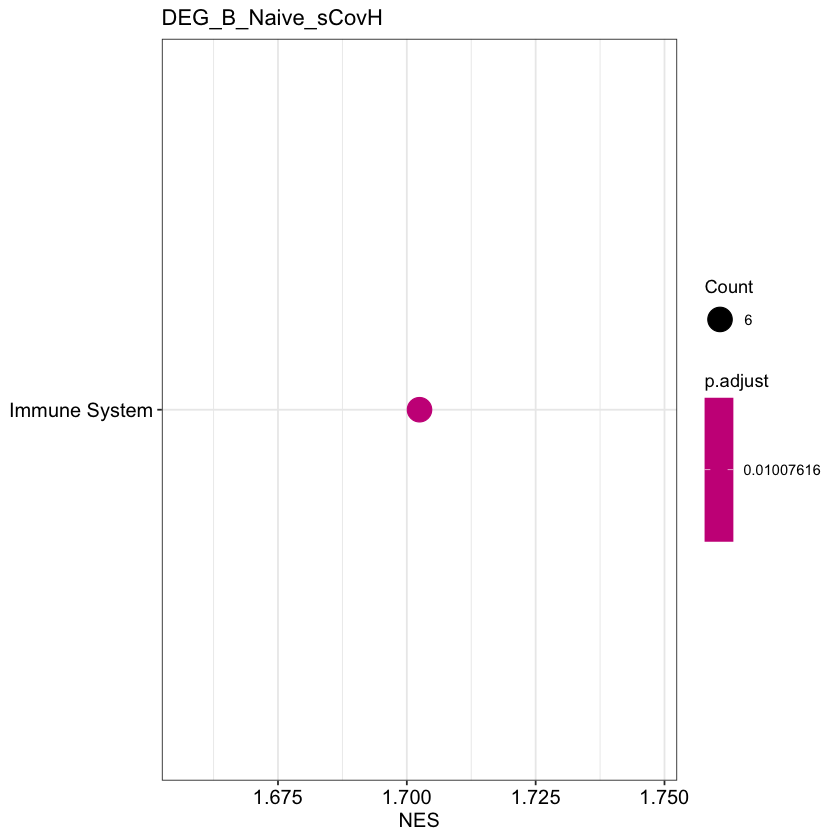

In [12]:
p1 <- dotplot(res[[4]], x = "NES", showCategory = 10) + ggtitle(names(geneList[4]))
p1

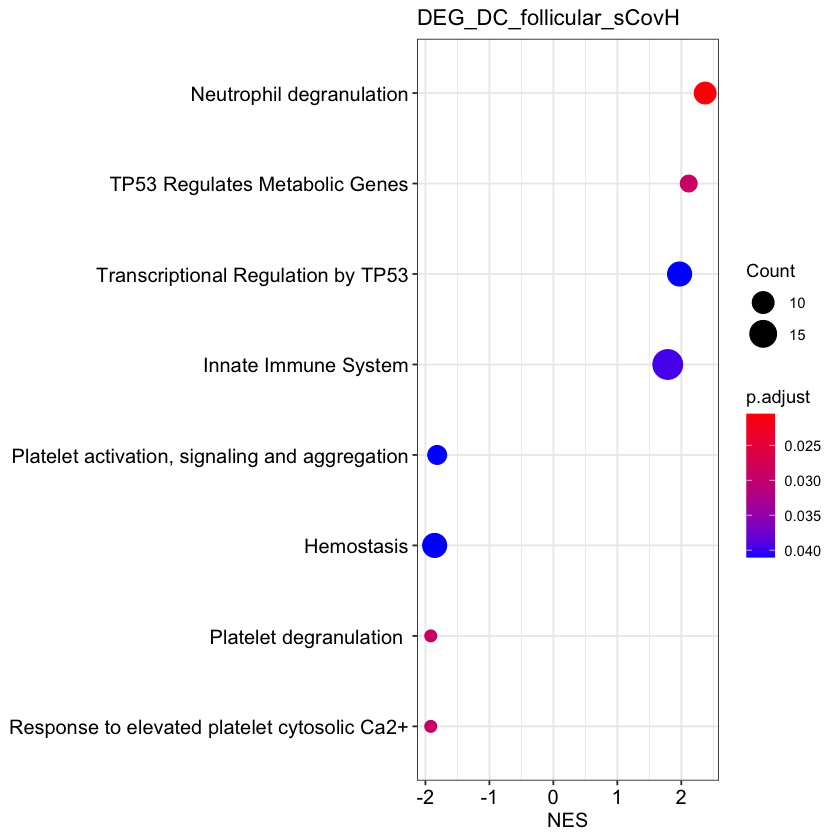

In [13]:
p2 <- dotplot(res[[18]], x = "NES", showCategory = 10) + ggtitle(names(geneList[18]))
p2

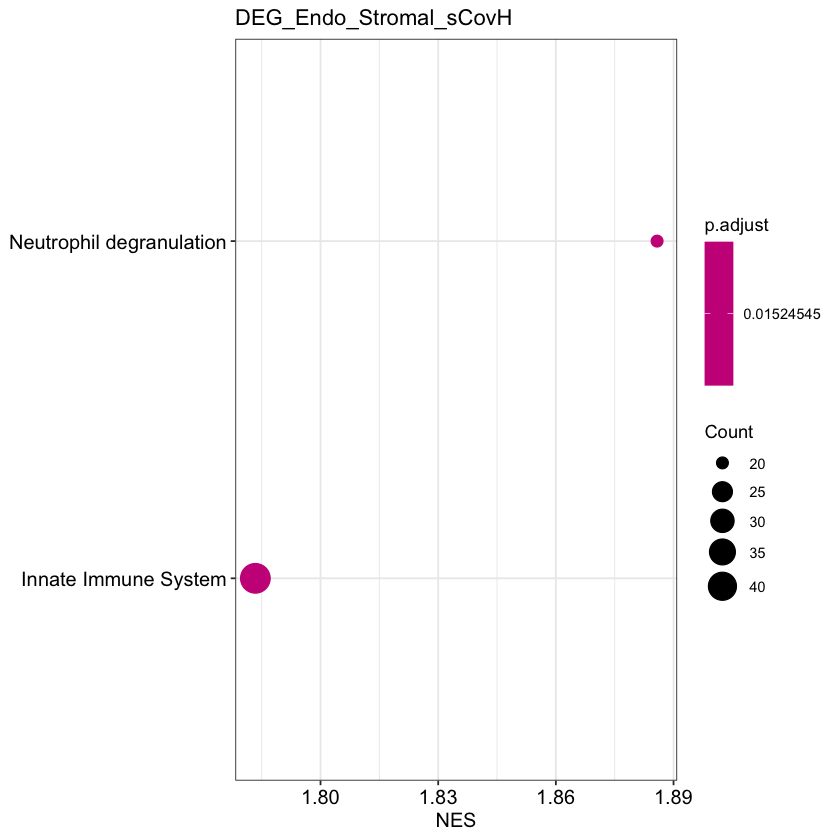

In [14]:
p3 <- dotplot(res[[20]], x = "NES", showCategory = 10) + ggtitle(names(geneList)[20])
p3

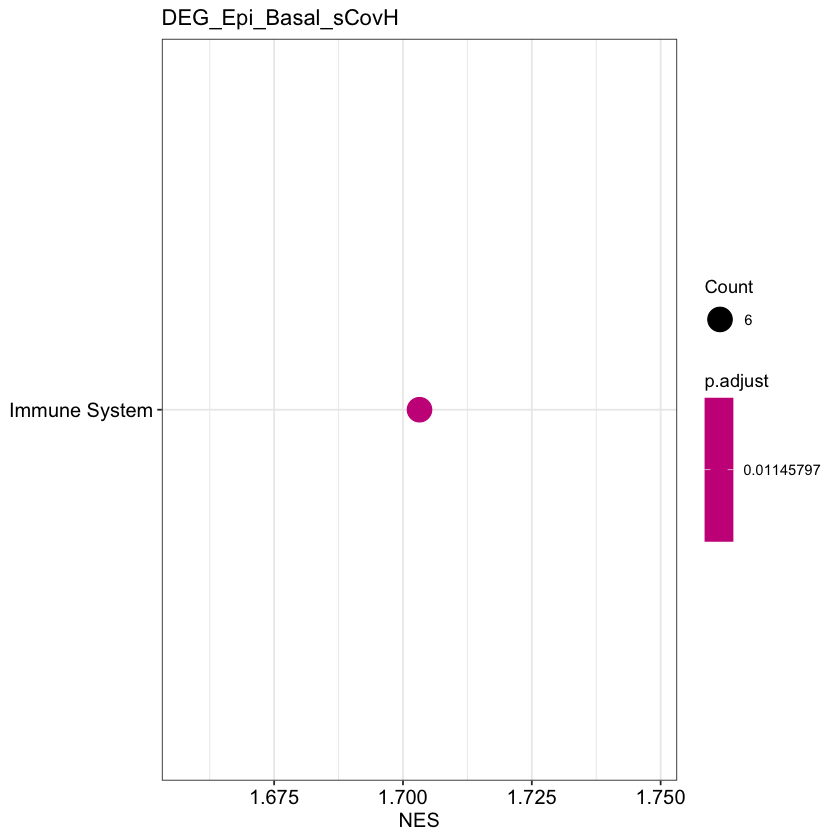

In [15]:
p4 <- dotplot(res[[21]], x = "NES", showCategory = 10) + ggtitle(names(geneList[21]))
p4

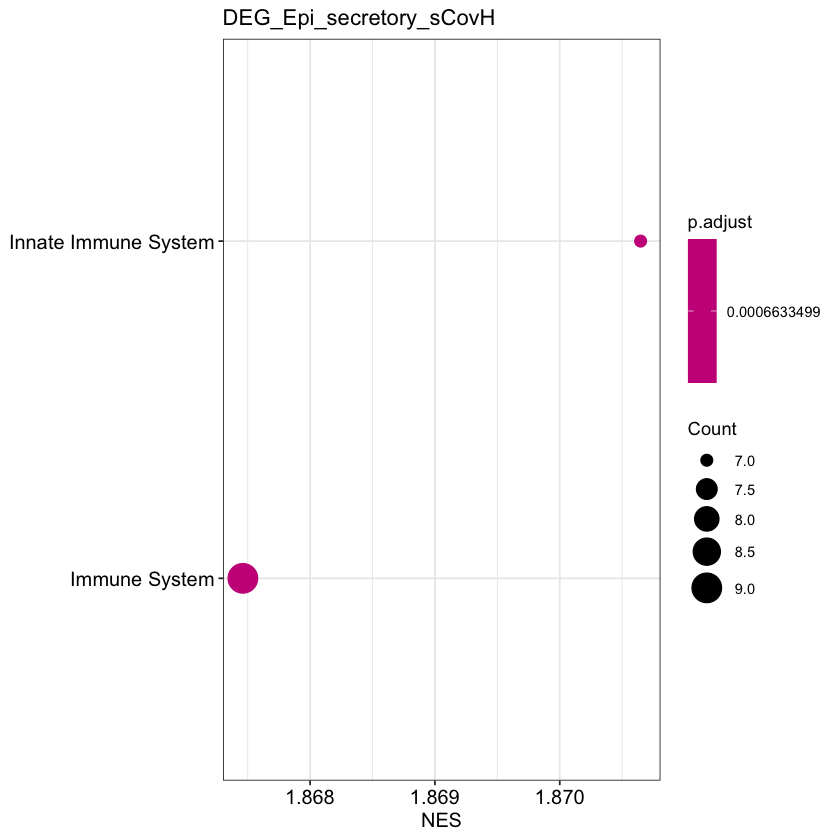

In [16]:
p5 <- dotplot(res[[23]], x = "NES", showCategory = 10) + ggtitle(names(geneList[23]))
p5

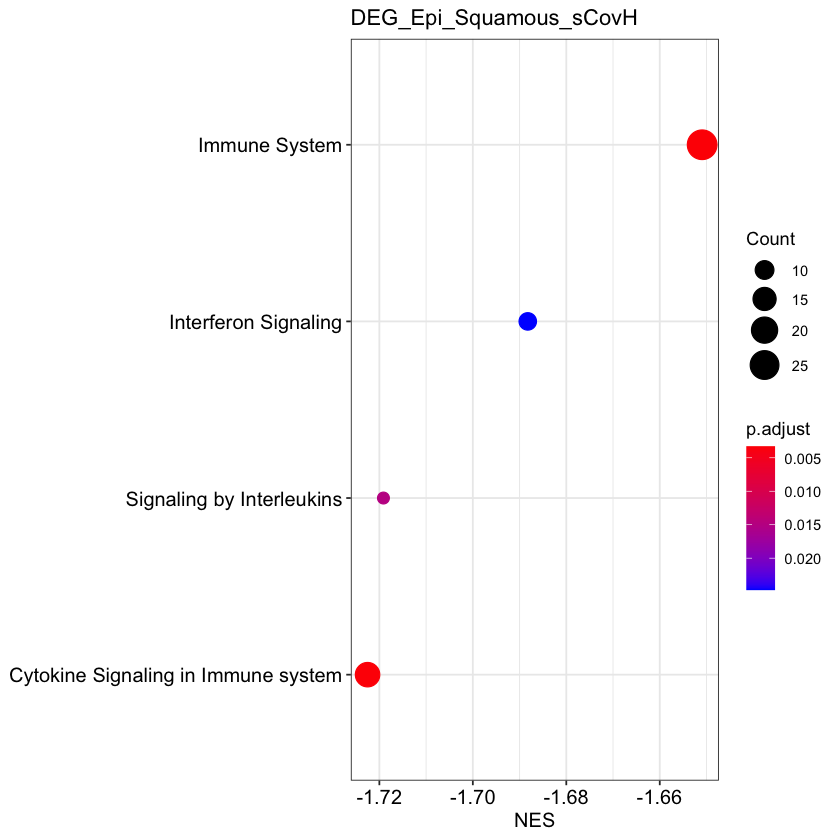

In [17]:
p6 <- dotplot(res[[24]], x = "NES", showCategory = 10) + ggtitle(names(geneList[24]))
p6

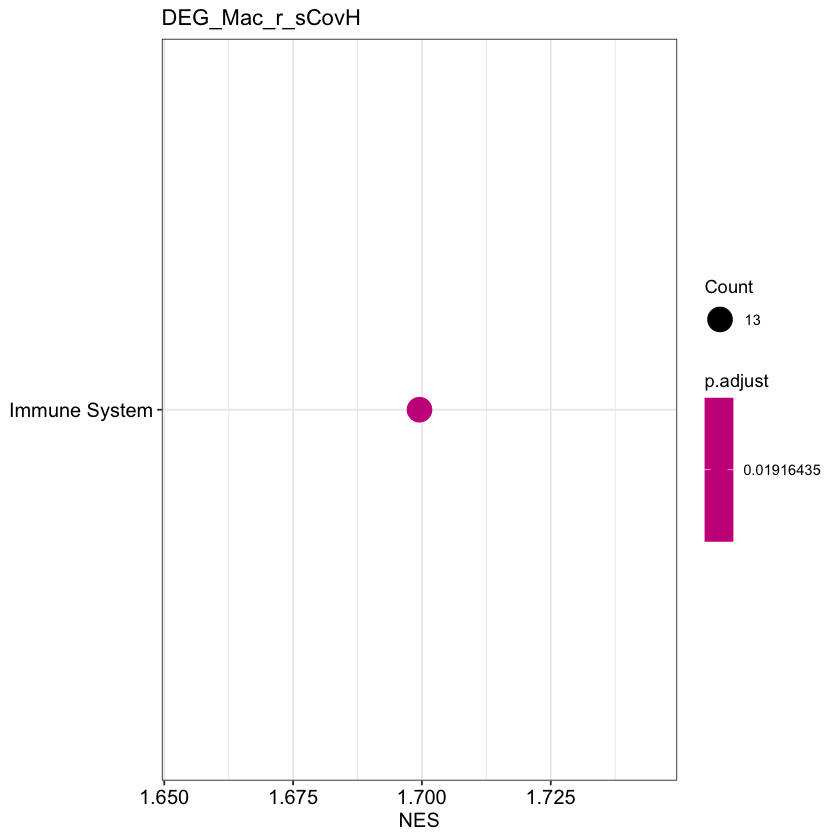

In [18]:
p7 <- dotplot(res[[30]], x = "NES", showCategory = 10) + ggtitle(names(geneList[30]))
p7

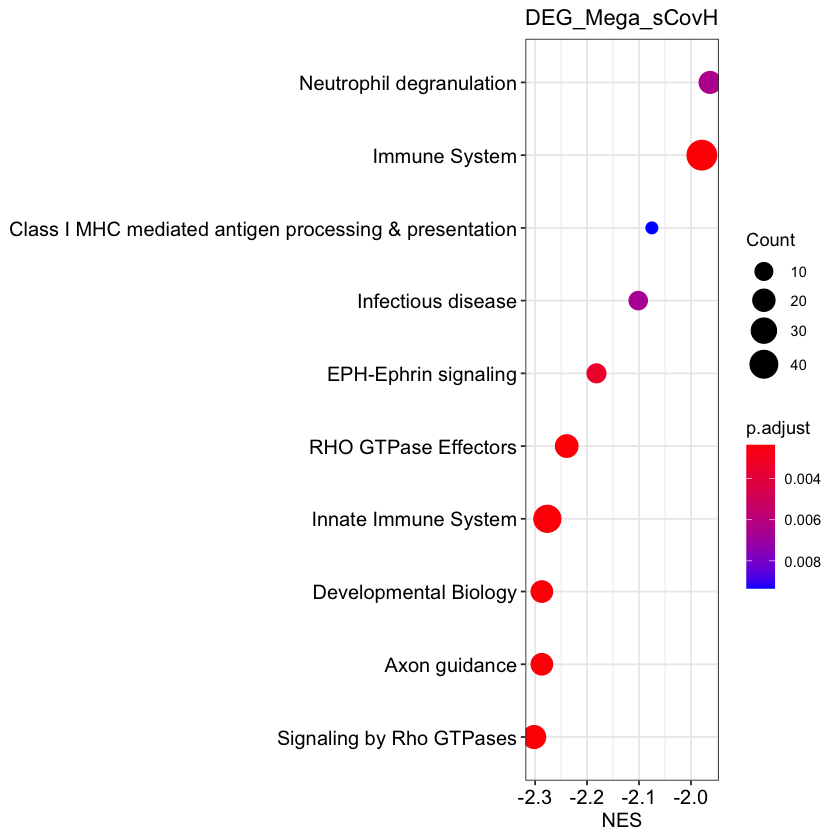

In [19]:
p8 <- dotplot(res[[33]], x = "NES", showCategory = 10) + ggtitle(names(geneList[33]))
p8

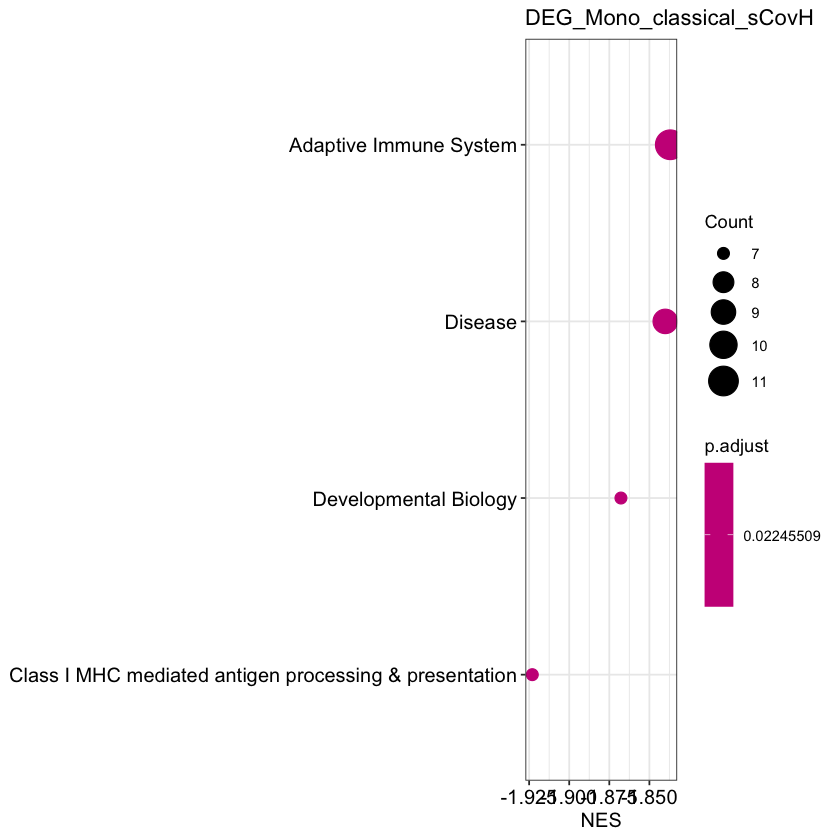

In [20]:
p9 <- dotplot(res[[34]], x = "NES", showCategory = 10) + ggtitle(names(geneList[34]))
p9

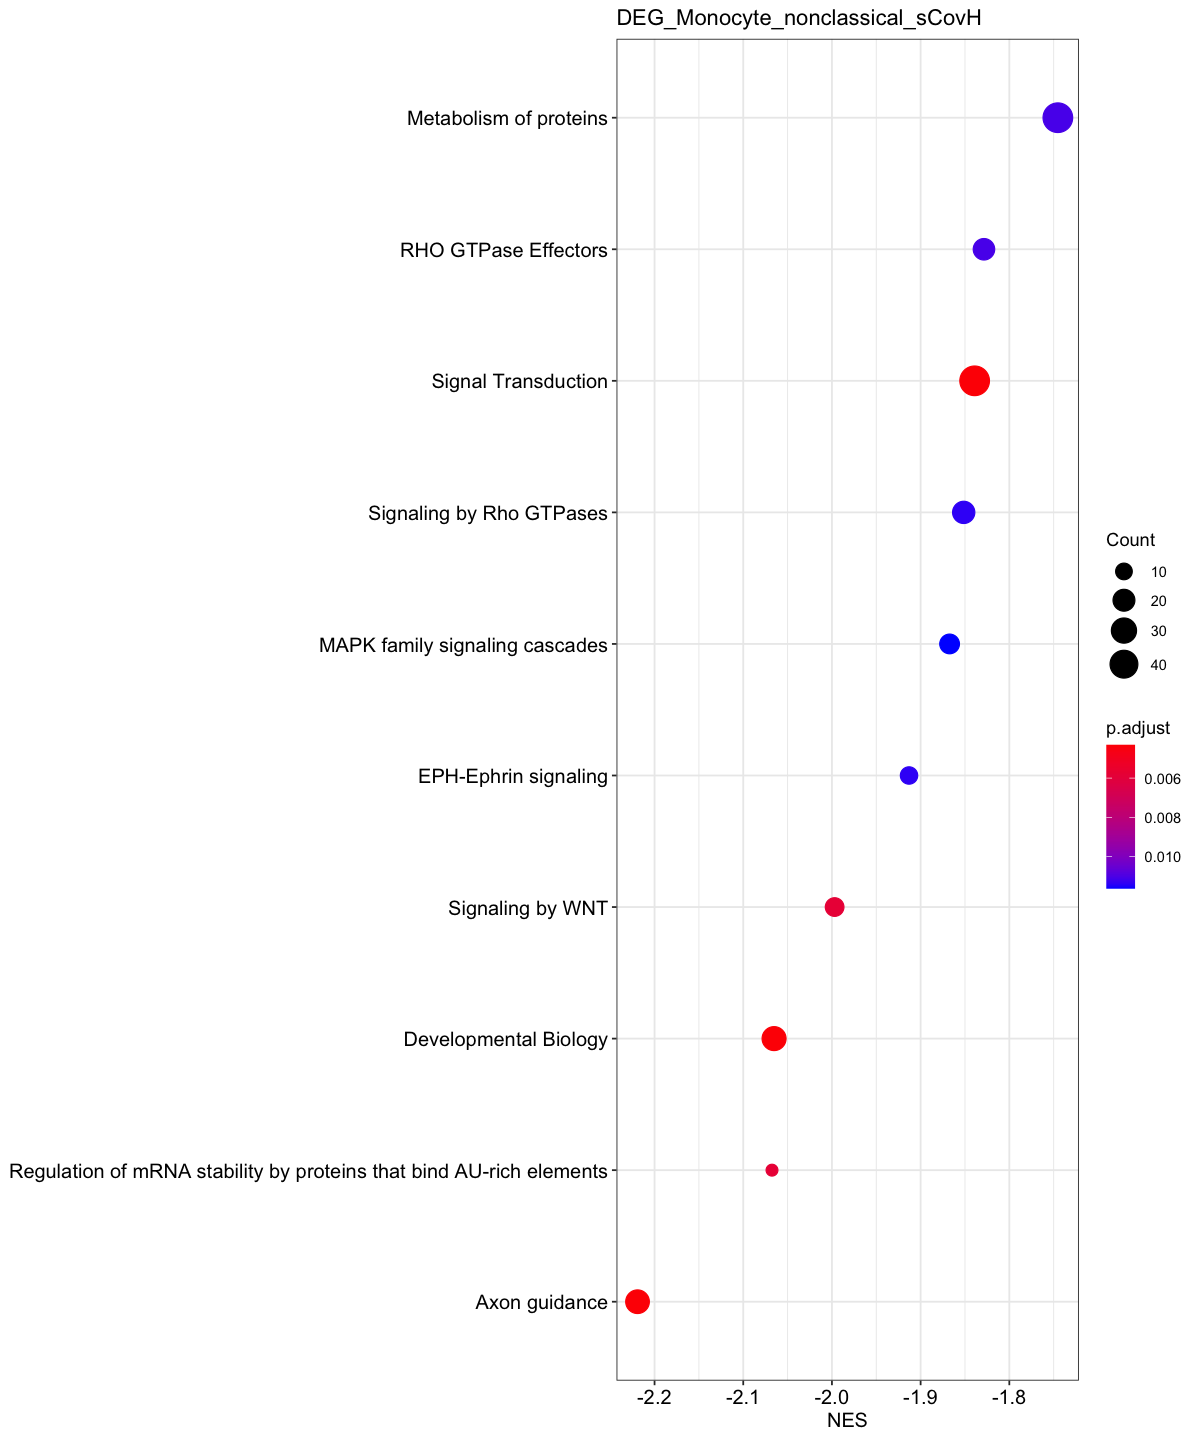

In [23]:
options(repr.plot.width = 10, repr.plot.height = 12)
p10 <- dotplot(res[[35]], x = "NES", showCategory = 10) + ggtitle(names(geneList[35]))
p10

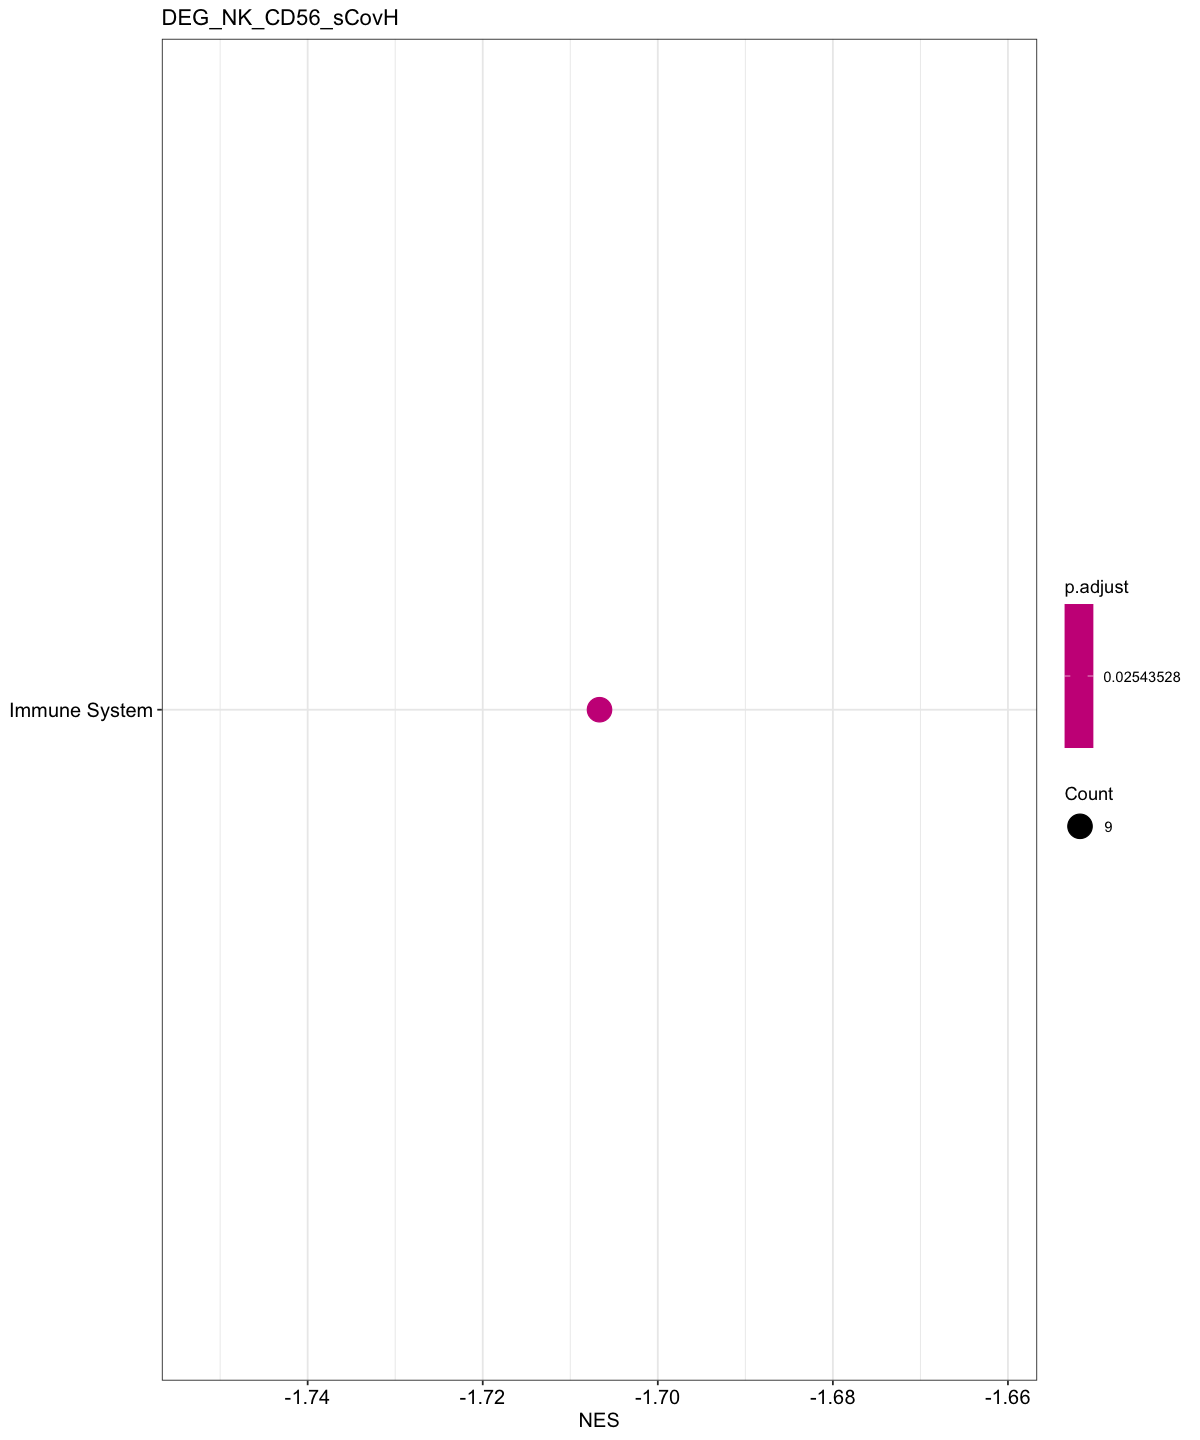

In [24]:
p11 <- dotplot(res[[38]], x = "NES", showCategory = 10) + ggtitle(names(geneList[38]))
p11

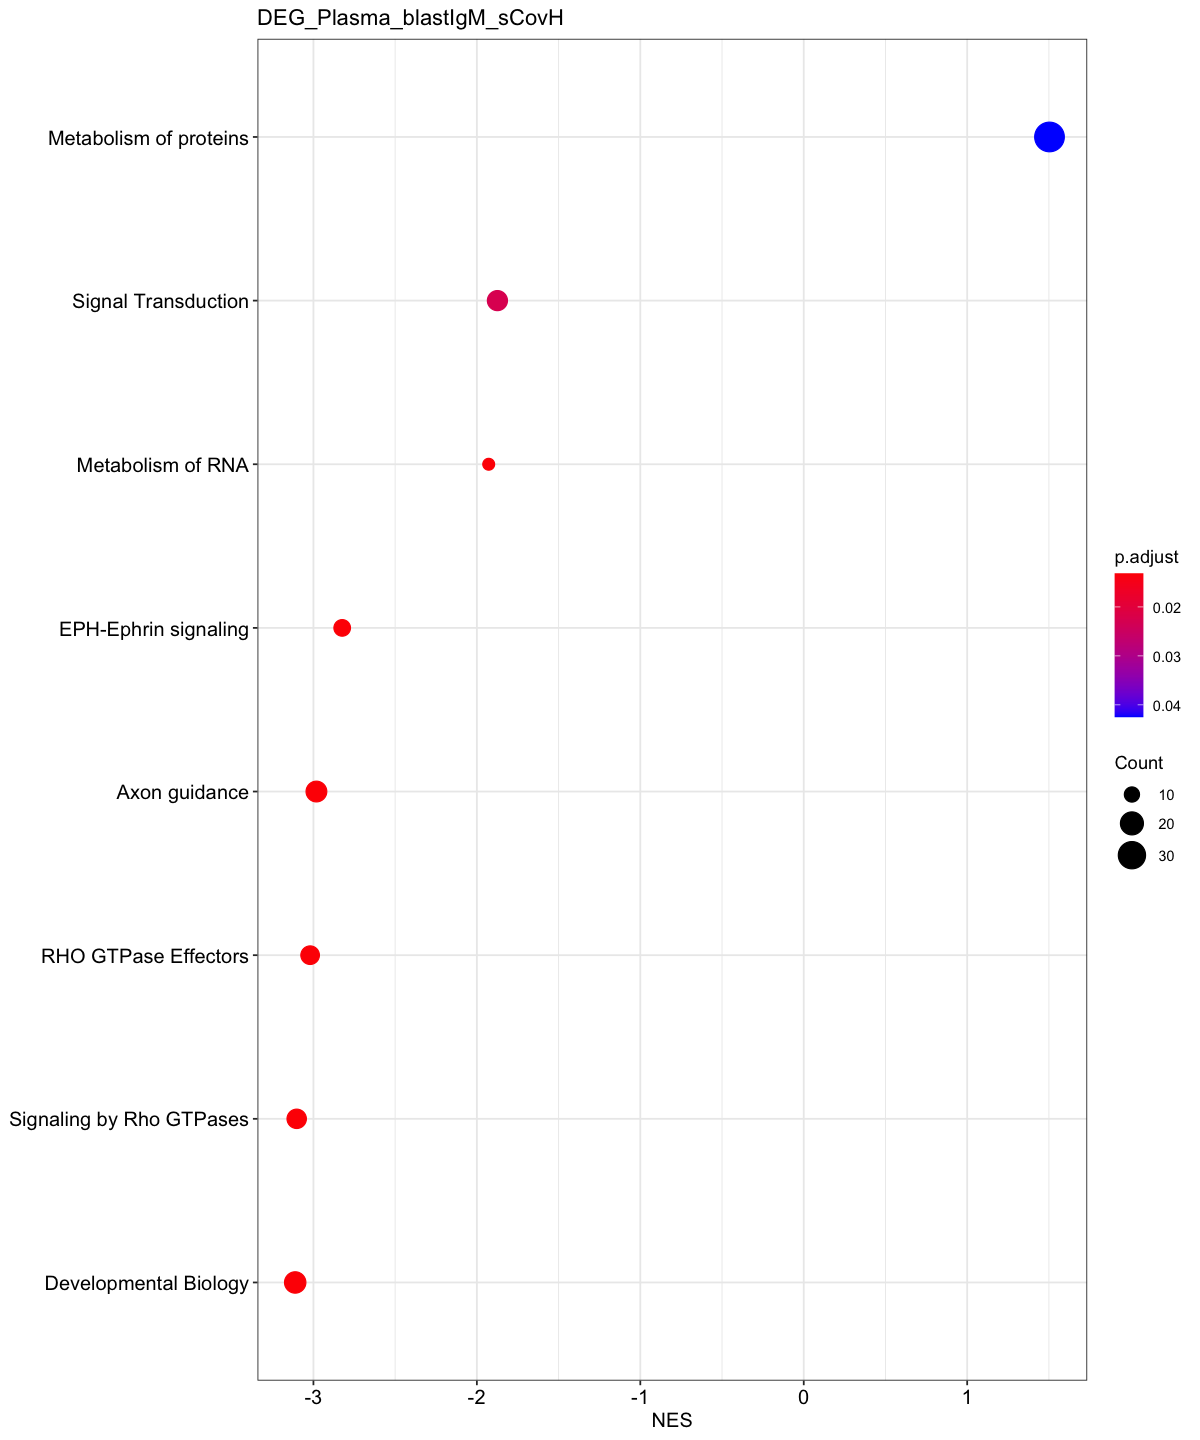

In [25]:
p12 <- dotplot(res[[39]], x = "NES", showCategory = 10) + ggtitle(names(geneList[39]))
p12

In [45]:
pdf("CovvsHealthyDEG_NK_CD16a.pdf")
p3
dev.off()

pdf 
  2

In [16]:
plotHistFunc <- function(x, na.rm = TRUE) {
  nm <- names(x)
  for (i in seq_along(nm)) {
print(ggplot(x,aes_string(x = nm[i])) + geom_histogram(alpha = .5,fill = "mediumseagreen")) }
}
plotHistFunc(res)

In [17]:
print(plotHistFunc(res))

NULL


In [18]:
res[c(1:4)]

[[1]]
#
# Gene Set Enrichment Analysis
#
#...@organism 	 human 
#...@setType 	 Reactome 
#...@keytype 	 ENTREZID 
#...@geneList 	 Named num [1:65] 12.853 5.481 3.398 3.203 0.988 ...
 - attr(*, "names")= chr [1:65] "1043" "914" "2014" "3001" ...
#...nPerm 	 10000 
#...pvalues adjusted by 'BH' with cutoff <0.2 
#...0 enriched terms found
'data.frame':	0 obs. of  8 variables:
 $ ID             : chr 
 $ Description    : chr 
 $ setSize        : int 
 $ enrichmentScore: num 
 $ NES            : num 
 $ pvalue         : num 
 $ p.adjust       : num 
 $ qvalues        : num 
#...Citation
  Guangchuang Yu, Qing-Yu He. ReactomePA: an R/Bioconductor package for
  reactome pathway analysis and visualization. Molecular BioSystems
  2016, 12(2):477-479 


[[2]]
#
# Gene Set Enrichment Analysis
#
#...@organism 	 human 
#...@setType 	 Reactome 
#...@keytype 	 ENTREZID 
#...@geneList 	 Named num [1:163] 158.2 82.7 43.2 21.1 20.6 ...
 - attr(*, "names")= chr [1:163] "3107" "10578" "1043" "9235" ...
#.

In [19]:
length(res)

[1] 15

In [20]:
head(geneList$DEG_Cd16gNK_filtered)

NULL

In [21]:
ego3 <- gseGO(geneList     = geneList$DEG_Cd16gNK_filtered,
              OrgDb        = org.Hs.eg.db,
              ont          = "CC",
              nPerm        = 1000,
              minGSSize    = 100,
              maxGSSize    = 500,
              pvalueCutoff = 0.05,
              verbose      = FALSE)
ego3

--> Expected input gene ID: 79595,79718,9612,91748,1161,9734



ERROR: Error in check_gene_id(geneList, geneSets): --> No gene can be mapped....


In [ ]:
library(DOSE)
de <- names(geneList$DEG_NKTCD8Tem_filtered)[abs(geneList$DEG_NKTCD8Tem_filtered) > 2]

edo <- enrichDGN(de)
edo

In [ ]:
summary(geneList)

In [ ]:
library(enrichplot)
barplot(edo, showCategory=20)

In [ ]:
data(geneList$DEG_Cd16gNK_filtered, package="DOSE")
gene <- names(geneList$DEG_Cd16gNK_filtered)[abs(geneList$DEG_Cd16gNK_filtered) > 2]

gmtfile <- system.file("extdata", "h.cc.v5.0.entrez.gmt", package="clusterProfiler")
h <- read.gmt(gmtfile)

egmt <- enricher(gene, TERM2GENE=h)
head(egmt)

In [ ]:
?data

In [ ]:
geneList$DEG_Cd16gNK_filtered